# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2022.01.24.1.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- Write your Python code that can answer the following questions, 
- and explain **ALL** your answers in plain English. 
- you can use as many code and markdown cells as you need for each question (i.e. don't limit yourself to just one of each if you feel you need more).

In [1]:
MY_UNIQNAME = 'michengz'  # replace this with your uniqname

In [2]:
import pandas as pd
import numpy as np

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What is the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

#### 1.1 Load the data

In [202]:
invoices =  pd.read_json('https://github.com/umsi-data-science/data/raw/main/invoices.json')
items = pd.read_json('https://github.com/umsi-data-science/data/raw/main/items.json')
purchases =  pd.read_json('https://github.com/umsi-data-science/data/raw/main/purchases.json')

In [245]:
invoices =  pd.read_json('https://github.com/umsi-data-science/data/raw/main/invoices.json')

In [246]:
invoices.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


In [247]:
invoices.shape

(25943, 4)

In [248]:
purchases.head()

,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6


In [249]:
purchases.shape

(532621, 3)

In [250]:
# Let's first remove rows with cancelled invoices for the invoices and purchases table
invoices = invoices[invoices['InvoiceNo'].str.contains('C') == False]
print(invoices.shape)
purchases = purchases[purchases['InvoiceNo'].str.contains('C') == False]
print(purchases.shape)

(22106, 4)
(532621, 3)


####  1.2 How many total invoices have been placed?

In [251]:
invoices.shape[0]

22106

In [252]:
invoices.nunique()

InvoiceNo      22064
InvoiceDate    19990
CustomerID      4339
Country           38
dtype: int64

In [253]:
invoices.InvoiceNo.value_counts()

550641    2
548203    2
553556    2
542806    2
541809    2
         ..
551704    1
551702    1
551701    1
551700    1
581587    1
Name: InvoiceNo, Length: 22064, dtype: int64

In [254]:
invoices[invoices['InvoiceNo'] == '541631']

,InvoiceNo,InvoiceDate,CustomerID,Country
2848,541631,1/20/11 10:47,12637.0,France
2849,541631,1/20/11 10:48,12637.0,France


When looking at the raw data, there are 22106 invoices that were recorded in total. However, there are only 22064 unique invoices made given that duplicated data were recorded for some invoices in the dataset.

####  1.3 How many unique customers are there?

In [255]:
invoices['CustomerID'].nunique()

4339

There are 4339 unique values for the CustomerID column. However, this column contains null values, which means that there are 4338 unique customers in reality.

#### 1.4 What is the total number of unique items?

In [256]:
items.head(2)

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39


In [257]:
items['StockCode'].nunique()

4070

There are 4070 unique items in total.

#### 1.5 Are there any columns with null values?

In [258]:
invoices.isna().sum()

InvoiceNo         0
InvoiceDate       0
CustomerID     3540
Country           0
dtype: int64

Yes, there are 3540 null values for the CustomerID column

#### 1.6 Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

Before joining the three tables, I would do some data cleaning for the matching columns. Then, I would first join the items table with the purchases table on the StockCode column by using an inner join. I would then join the table with the invoices table on the InvoiceNo column and use an inner join so that it would show multiple rows of purchases for each invoice.

### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

#### 2.1 For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.

In [263]:
# Let's first fix the data type for the CustomerID column in the invoices table
invoices['CustomerID'] = invoices['CustomerID'].astype(str).apply(lambda x: x[:5])
invoices.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850,United Kingdom
1,536366,12/1/10 8:28,17850,United Kingdom


In [306]:
invoices.groupby('CustomerID').describe()['InvoiceNo']['unique'].sort_values(ascending = False)

CustomerID
nan      3528
12748     210
14911     201
17841     124
13089      97
         ... 
15313       1
15308       1
15307       1
15303       1
15300       1
Name: unique, Length: 4340, dtype: object

In [305]:
invoices.groupby('CustomerID').describe()['InvoiceNo']['unique'].sort_values(ascending = False)[1:11]

CustomerID
12748    210
14911    201
17841    124
13089     97
14606     93
15311     91
12971     86
14646     74
16029     63
13408     62
Name: unique, dtype: object

The first list above are the calculations for the total number of invoices per customer, whereas the second list shows the top 10 customers with the most amount of placed invoice.

#### 2.2 Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.

In [276]:
invoices.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850,United Kingdom
1,536366,12/1/10 8:28,17850,United Kingdom


In [277]:
items.head(2)

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39


In [275]:
purchases.head(2)

,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6


In [417]:
# Joining the tables together
purchases['StockCode'] = purchases['StockCodeSC'].apply(lambda x: x[2:])
df = purchases.merge(items, on = 'StockCode')
df = invoices.merge(df, on ='InvoiceNo')
df

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,StockCode,Description,UnitPrice
0,536365,12/1/10 8:26,17850,United Kingdom,SC85123A,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,536365,12/1/10 8:26,17850,United Kingdom,SC71053,6,71053,WHITE METAL LANTERN,3.39
2,536365,12/1/10 8:26,17850,United Kingdom,SC84406B,8,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,536365,12/1/10 8:26,17850,United Kingdom,SC84029G,6,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,536365,12/1/10 8:26,17850,United Kingdom,SC84029E,6,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39
...,...,...,...,...,...,...,...,...,...
535960,581587,12/9/11 12:50,12680,France,SC22613,12,22613,PACK OF 20 SPACEBOY NAPKINS,1.66
535961,581587,12/9/11 12:50,12680,France,SC22138,3,22138,BAKING SET 9 PIECE RETROSPOT,4.95
535962,581587,12/9/11 12:50,12680,France,SC23254,4,23254,CHILDRENS CUTLERY DOLLY GIRL,4.15
535963,581587,12/9/11 12:50,12680,France,SC23256,4,23256,CHILDRENS CUTLERY SPACEBOY,4.15


In [329]:
df.groupby('CustomerID').sum()['Quantity'].sort_values(ascending = False)

CustomerID
nan      283903
14646    197491
14911     81009
16446     80997
12415     77670
          ...  
16742         1
17956         1
15802         1
17846         1
15823         1
Name: Quantity, Length: 4340, dtype: int64

In [330]:
df.groupby('CustomerID').sum()['Quantity'].sort_values(ascending = False)[1:11]

CustomerID
14646    197491
14911     81009
16446     80997
12415     77670
12346     74215
17450     69993
17511     67423
18102     64124
13694     63312
14298     58343
Name: Quantity, dtype: int64

The first list above are the calculations for the total quantity of items purchased by each customer, while the second list shows the top 10 customers with the highest quantity of purchased items.

#### 2.3 Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

When comparing the top 10 customers, we could see that customer 12748 placed the most number of invoices, while customer 14646 purchased the greatest quantity of items in total. Therefore, it doesn't appear that the more invoices a customer have, the greater the total quantity of items.

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $25?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

#### 3.1 What is the average item-unit price?

In [343]:
items.head(2)

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39


In [341]:
# Let's make sure that there aren't anu duplicated items in the items table
print(items.shape[0])
print(items['StockCode'].nunique())

4070
4070


In [344]:
items['UnitPrice'].mean()

6.905277886977952

The average unit price for the items is $6.90.

#### 3.2 What % of items are under 25?

In [349]:
items[items['UnitPrice'] < 25].shape[0] / items.shape[0]

0.9874692874692874

There are 98.74% of the items that are under $25.

#### 3.3 Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram?

In [355]:
items['UnitPrice'].sort_values()

3260        0.00
3283        0.00
3282        0.00
3280        0.00
3279        0.00
          ...   
190       165.00
2541      175.00
1591      295.00
952       569.77
3753    11062.06
Name: UnitPrice, Length: 4070, dtype: float64

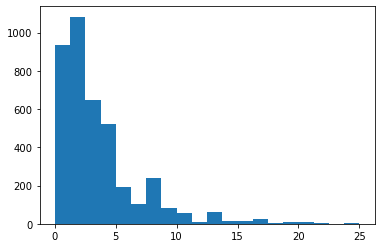

In [363]:
import matplotlib.pyplot as plt

plt.hist(items['UnitPrice'], bins = 20, range=(0, 25))
plt.show()

Given the information from 3.2 that there are 98.74% of the items that are under 25 dollars, I set the x-axis value range from 0 to 25. From. the histogram, we could see that most items fall in the unit price range between $0 to $5, with a minority of products having prices greater than $10.

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them. Do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.) 
1. Do the top 5 invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

#### 4.1 What are the top 10 most ordered items? Describe them. Do you see any trends?

In [404]:
top_10 = purchases.groupby('StockCode').sum().sort_values(by = ['Quantity'], ascending = False).iloc[:10]
top_10 = top_10.reset_index()
top_10

,StockCode,Quantity
0,23843,80995
1,23166,78033
2,22197,56921
3,84077,55047
4,85099B,48478
5,85123A,41408
6,21212,36419
7,84879,36301
8,23084,30754
9,22492,26633


In [405]:
top_10.merge(items, on = 'StockCode')

,StockCode,Quantity,Description,UnitPrice
0,23843,80995,"PAPER CRAFT , LITTLE BIRDIE",2.08
1,23166,78033,MEDIUM CERAMIC TOP STORAGE JAR,1.04
2,22197,56921,SMALL POPCORN HOLDER,0.72
3,84077,55047,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.29
4,85099B,48478,JUMBO BAG RED RETROSPOT,1.65
5,85123A,41408,WHITE HANGING HEART T-LIGHT HOLDER,2.55
6,21212,36419,PACK OF 72 RETROSPOT CAKE CASES,0.42
7,84879,36301,ASSORTED COLOUR BIRD ORNAMENT,1.69
8,23084,30754,RABBIT NIGHT LIGHT,2.08
9,22492,26633,MINI PAINT SET VINTAGE,0.65


The top 10 most order items by customers are shown in the table above. As we can see, most of them have a unit price lower than $2.5.

#### 4.2 What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.)

In [418]:
df['Revenue'] = df['Quantity'] * df['UnitPrice'] * 1.25
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,StockCode,Description,UnitPrice,Revenue
0,536365,12/1/10 8:26,17850,United Kingdom,SC85123A,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,19.125
1,536365,12/1/10 8:26,17850,United Kingdom,SC71053,6,71053,WHITE METAL LANTERN,3.39,25.425
2,536365,12/1/10 8:26,17850,United Kingdom,SC84406B,8,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,27.500
3,536365,12/1/10 8:26,17850,United Kingdom,SC84029G,6,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,25.425
4,536365,12/1/10 8:26,17850,United Kingdom,SC84029E,6,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,25.425


In [427]:
df_top5_rev = df.groupby('InvoiceNo').sum().reset_index().sort_values(by = ['Revenue'], ascending = False)[:5]
df_top5_rev

,InvoiceNo,Quantity,UnitPrice,Revenue
5485,547966,1000,569.77,712212.5000
22025,581483,80995,2.08,210587.0000
2303,541431,74215,1.04,96479.5000
9654,556255,3600,99.48,37305.0000
9951,556917,15049,356.45,34545.9125


The top 5 invoices that generated the most revenue are show in the table above. The highest revenue from an invoice was $712212.50.

#### 4.3 Do the top 5 invoices contain any of the top 10 most ordered items?

In [462]:
ordered_items = df.merge(df_top5_rev, on = 'InvoiceNo')['StockCode'].unique().tolist()

In [466]:
lst = top_10.merge(items, on = 'StockCode')['StockCode'].to_list()
lst

['23843',
 '23166',
 '22197',
 '84077',
 '85099B',
 '85123A',
 '21212',
 '84879',
 '23084',
 '22492']

In [467]:
for i in lst:
    if i in ordered_items:
        print(i)

23843
23166
85099B
21212
23084
22492


Yes, there are 6 top 10 most ordered items in the top 5 invoices.

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1500  
 * medium value: between 1500 and 8000 dollars
 * high value: greater than \$8000
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Choose three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

#### 5.1 Classify customers into segments based on the total revenue they have generated for the company.

In [472]:
df_2 = df.groupby('CustomerID').sum().reset_index()
df_2

,CustomerID,Quantity,UnitPrice,Revenue
0,12346,74215,1.04,9.647950e+04
1,12347,2458,578.04,6.798050e+03
2,12348,2341,94.38,2.237700e+03
3,12349,631,403.71,2.408700e+03
4,12350,197,51.09,5.100500e+02
...,...,...,...,...
4335,18281,54,36.14,8.435000e+01
4336,18282,103,62.61,2.904625e+02
4337,18283,1397,1258.59,2.655050e+03
4338,18287,1586,134.26,3.420375e+03


In [478]:
df_2['Revenue'].max()

2239697.175

In [481]:
df_2['Value'] = pd.cut(df_2['Revenue'],[0,1500,8000,2500000],labels = ['low value','medium value','high value'])

In [483]:
df_2

,CustomerID,Quantity,UnitPrice,Revenue,Value
0,12346,74215,1.04,9.647950e+04,high value
1,12347,2458,578.04,6.798050e+03,medium value
2,12348,2341,94.38,2.237700e+03,medium value
3,12349,631,403.71,2.408700e+03,medium value
4,12350,197,51.09,5.100500e+02,low value
...,...,...,...,...,...
4335,18281,54,36.14,8.435000e+01,low value
4336,18282,103,62.61,2.904625e+02,low value
4337,18283,1397,1258.59,2.655050e+03,medium value
4338,18287,1586,134.26,3.420375e+03,medium value


#### 5.2 How many customers are in each segment?

In [484]:
df_2['Value'].value_counts()

low value       2658
medium value    1432
high value       250
Name: Value, dtype: int64

There are 2658 customers in the low value segment, 1432 customers in the medium value segment, and 250 customers in te high value segement.

#### 5.3 Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.

In [514]:
df_3 = df.merge(df_2, on='CustomerID')
df_3 = df_3[['StockCode','Quantity_x','Value']]
df_3 = df_3.groupby(['Value','StockCode']).mean()
df_3

Quantity_x
Value      StockCode               
low value  10002           8.222222
           10080          14.000000
           10120           4.692308
           10123C          2.000000
           10123G               NaN
...                             ...
high value gift_0001_20    2.000000
           gift_0001_30    4.625000
           gift_0001_40    1.000000
           gift_0001_50    1.000000
           m               1.000000

[12177 rows x 1 columns]

#### 5.4 Are the items with the highest average order quantity generally the same across segments? Explain your reasoning.

In [520]:
df_3.loc['low value'].sort_values(by = 'Quantity_x',ascending = False)[:1]

,Quantity_x
StockCode,
17096,516.75


In [521]:
df_3.loc['medium value'].sort_values(by = 'Quantity_x',ascending = False)[:1]

,Quantity_x
StockCode,
18007,570.5


In [522]:
df_3.loc['high value'].sort_values(by = 'Quantity_x',ascending = False)[:1]

,Quantity_x
StockCode,
23843,80995.0


As we can see from the three calculated highest quantity averages above, the averages for the low and medium segments were quite similar. However, the highest average order quantity for the high value segement was way higher than the other two segments.

#### 5.5 Choose three items and discuss any trends/differences you notice across the three segments.

In [525]:
print(df_3.loc['low value'].loc['17096'])
print(df_3.loc['medium value'].loc['17096'])
print(df_3.loc['high value'].loc['17096'])

Quantity_x    516.75
Name: 17096, dtype: float64
Quantity_x    36.714286
Name: 17096, dtype: float64
Quantity_x    11.533333
Name: 17096, dtype: float64


For item 17096, which was the highest order quantity in the low segement, we could see that its order quantity decreased as we go move from the low value segment to high value segement, which means that the item may be more popular for the low value segments.

In [526]:
print(df_3.loc['low value'].loc['18007'])
print(df_3.loc['medium value'].loc['18007'])
print(df_3.loc['high value'].loc['18007'])

Quantity_x    17.166667
Name: 18007, dtype: float64
Quantity_x    570.5
Name: 18007, dtype: float64
Quantity_x   -172.375
Name: 18007, dtype: float64


In [527]:
print(df_3.loc['low value'].loc['23843'])
print(df_3.loc['medium value'].loc['23843'])
print(df_3.loc['high value'].loc['23843'])

Quantity_x   NaN
Name: 23843, dtype: float64
Quantity_x   NaN
Name: 23843, dtype: float64
Quantity_x    80995.0
Name: 23843, dtype: float64


As for item 23843, it looks like only customers from high value segments bought this specific item.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas